<a href="https://colab.research.google.com/github/han-juyoung/Aimers_Lectures/blob/main/Machine_Learning_%EC%B0%A8%EC%9B%90_%EC%B6%95%EC%86%8C%EB%A1%9C_%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D_%EC%84%B1%EB%8A%A5_%ED%96%A5%EC%83%81%EC%8B%9C%ED%82%A4%EA%B8%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

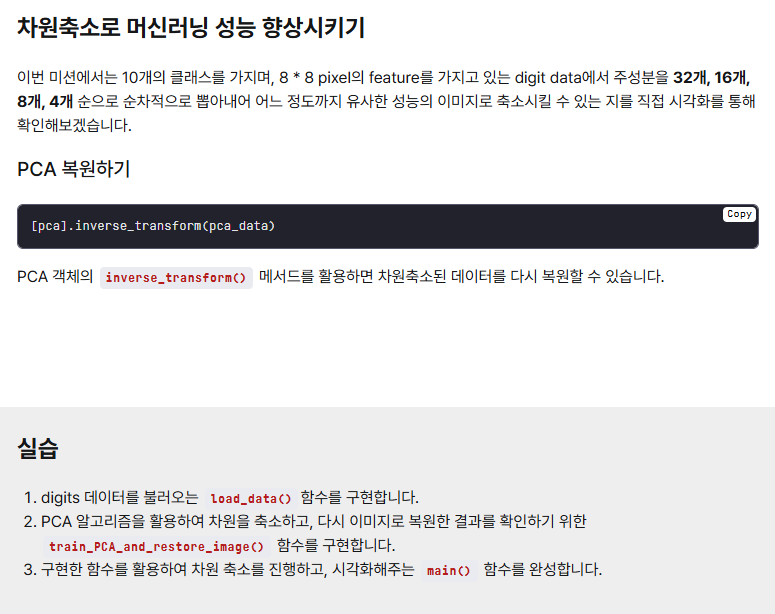

In [ ]:
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA

import numpy as np
import matplotlib.pyplot as plt

from elice_utils import EliceUtils
elice_utils = EliceUtils()

"""
    1. digits 데이터를 불러오는
       load_data() 함수를 구현합니다.
"""
def load_data():
    X, y = load_digits(return_X_y=True)

    return X, y

"""
    2. PCA 알고리즘을 활용하여 차원을 축소하고,
       다시 이미지로 복원한 결과를 확인하기 위한
       train_PCA_and_restore_image() 함수를 구현합니다.

       Step01. dim_reduction_number개의 차원으로 축소하는
               PCA 모델을 생성합니다.

       Step02. 생성한 PCA 모델을 이용하여 차원 축소를 진행합니다.

       Step03. 축소된 데이터를 다시 이미지 데이터로 복원합니다.

       Step04. 축소된 이미지의 log-likelihood를 통해 점수를 확인합니다.
"""
def train_PCA_and_restore_image(dim_reduction_number, images):
    # PCA 모델 생성 및 차원 축소
    pca = PCA(n_components=dim_reduction_number)
    X_pca = pca.fit_transform(images)

    # 차원 축소 데이터를 원래 공간으로 복원
    approxOriginal = pca.inverse_transform(X_pca)
    score = pca.score(approxOriginal)


    return approxOriginal, score

"""
digit 이미지를 시각화합니다.
"""
def visualize(X, x_label, title):

    plt.figure(figsize=(5,4));
    n_data = 100

    plt.imshow(X[n_data].reshape(8, 8),
                  cmap = plt.cm.gray, interpolation='nearest')
    plt.xlabel(x_label, fontsize = 12)
    plt.title(title, fontsize = 14)

    plt.savefig('PCA.png')
    elice_utils.send_image('PCA.png')

"""
    3. 구현한 함수를 활용하여 차원 축소를 진행하고
       시각화해주는 main() 함수를 완성합니다.
"""
def main():

    X,y = load_data()

    # 차원 축소와 이미지 복원 진행하기
    reduced_image_32, score_32 = train_PCA_and_restore_image(32, X)
    reduced_image_16, score_16 = train_PCA_and_restore_image(16, X)
    reduced_image_8, score_8 = train_PCA_and_restore_image(8, X)
    reduced_image_4, score_4 = train_PCA_and_restore_image(4, X)

    # 시각화 함수 호출하기
    visualize(X, '64', 'Original_data')
    visualize(reduced_image_32, '32', '32 dim')
    visualize(reduced_image_16, '16', '16 dim')
    visualize(reduced_image_8, '8', '8 dim')
    visualize(reduced_image_4, '4', '4 dim')


if __name__ == '__main__':
    main()

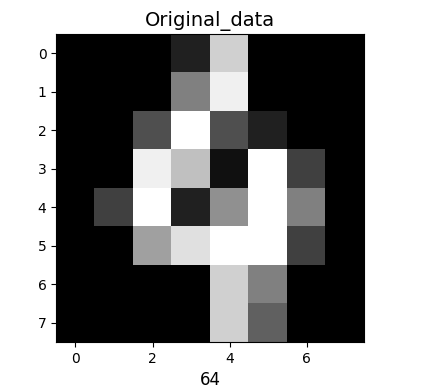

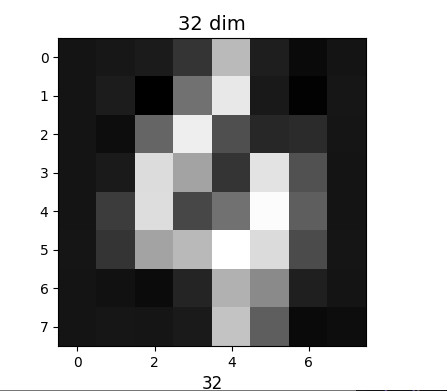

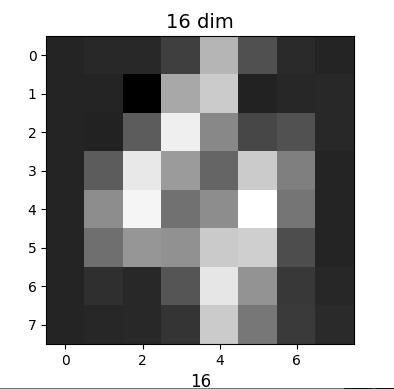

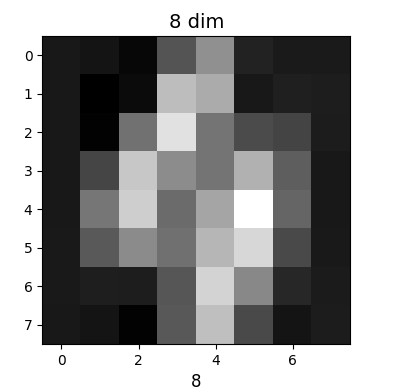

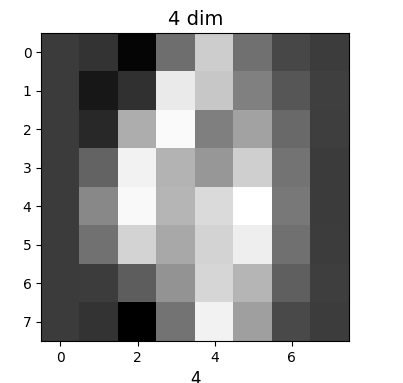